We can use principal component analysis (PCA) for the following purposes:
* To reduce the number of dimensions in the dataset.
* To find patterns in the high-dimensional dataset

**Eigenvectors and eigenvalues**
The eigenvectors and eigenvalues ​​of a covariance matrix (or correlation) describe the source of the PCA. Eigenvectors (main components) determine the direction of the new attribute space, and eigenvalues ​​determine its magnitude.

In [19]:
# Import the required variables
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [21]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [22]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

<Figure size 432x288 with 0 Axes>

In [23]:
# Import the required variables
import pandas as pd
import numpy as np

# Read the data
Res_Nonhydro_Capita = pd.read_excel ("../data/processed/Res_Nonhydro_Capita.xlsx", index_col = 0)
SDGs_Ranks_2021 = pd.read_excel ("../data/processed/SDGs_Ranks_2021.xlsx", index_col = 0)
SDGs_Scores_2021 = pd.read_excel ("../data/processed/SDGs_Scores_2021.xlsx", index_col = 0)

# Only consider the 2021 year
Res_Nonhydro_Capita_2021 = Res_Nonhydro_Capita[[2021]]
Res_Nonhydro_Capita_2021= Res_Nonhydro_Capita_2021.rename(columns={ 2021: 'Res_Nonhydro_Capita_2021'})

# Do not consider the first column
SDGs_Ranks_2021 = SDGs_Ranks_2021.iloc[:,1:]
SDGs_Scores_2021 = SDGs_Scores_2021.iloc[:,1:]

# Append the target to the Datasets
SDGs_Ranks_2021 = pd.concat([SDGs_Ranks_2021, Res_Nonhydro_Capita_2021], axis=1)
SDGs_Scores_2021 = pd.concat([SDGs_Scores_2021, Res_Nonhydro_Capita_2021], axis=1)

# Conclusion - Modelo PCA DecisionTreeRegressor SDGs_Scores_2021

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score


# X = SDGs_Ranks_2021.drop('Res_Nonhydro_Capita_2021',1)
# y = SDGs_Ranks_2021['Res_Nonhydro_Capita_2021']

X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [25]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
#y_train = np.array(y_train)

maxComponents = [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
maxDepth = [ 2, 3, 5, 10, 20, 30, 40]
#maxFeatures = [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
maxFeatures = [ (1/17), (2/17), (3/17), (4/17), (5/17), (6/17), (7/17), (8/17), (9/17), (10/17), (11/17), (12/17), (13/17), (14/17), (15/17), (16/17), (17/17)]

n = 0
for componentsi in maxComponents:
    pca = PCA(n_components=componentsi, random_state=42)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    for depthi in maxDepth:
        for featuresi in maxFeatures:
            dtr = DecisionTreeRegressor(max_depth = depthi, max_features = featuresi, random_state=42)
            dtr.fit(X_train_scaled_pca, y_train)
            y_pred = dtr.predict(X_test_scaled_pca)
            if (n == 0): # The first time initialize
                MAE_Best = mean_absolute_error(y_test, y_pred)
                max_components_Best = componentsi
                max_depth_Best = depthi
                max_features_Best = featuresi
            else:
                MAE_New = mean_absolute_error(y_test, y_pred)
                if (MAE_New < MAE_Best):
                    MAE_Best = MAE_New
                    max_components_Best = componentsi
                    max_depth_Best = depthi
                    max_features_Best = featuresi
                else:
                    pass
        n +=1
print('MAE_Best', MAE_Best, 'max_components_Best', max_components_Best, 'max_depth_Best', max_depth_Best, 'max_features_Best', max_features_Best)

MAE_Best 121.81291854595497 max_components_Best 2 max_depth_Best 20 max_features_Best 0.058823529411764705


Coeficiente determinación Train: 1.0
MAE Train: 0.0
MAPE Train: 0.0
MSE Train: 0.0
RMSE Train: 0.0
--------------------
Coeficiente determinación Test: 0.9484216064860829
MAE Test: 121.81291854595497
MAPE Test: 668112263044942.8
MSE Test: 36610.13147465146
RMSE Test: 191.3377418980674


<Figure size 1440x1440 with 0 Axes>

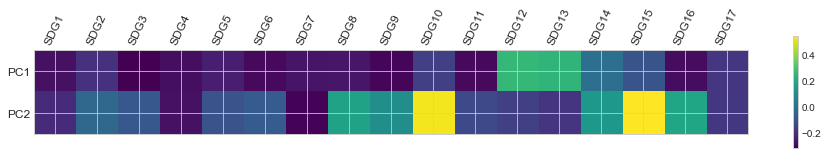

In [26]:
import matplotlib.pyplot as plt

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
#y_train = np.array(y_train)

pca = PCA(n_components=2, random_state=42)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)
dtr = DecisionTreeRegressor(max_depth = 20, max_features = 0.058823529411764705, random_state=42)
dtr.fit(X_train_scaled_pca, y_train)
y_pred = dtr.predict(X_test_scaled_pca)

print("Coeficiente determinación Train:", r2_score(y_train, dtr.predict(X_train_scaled_pca)))
print("MAE Train:", mean_absolute_error(y_train, dtr.predict(X_train_scaled_pca)))
print("MAPE Train:", mean_absolute_percentage_error(y_train, dtr.predict(X_train_scaled_pca)))
print("MSE Train:", mean_squared_error(y_train, dtr.predict(X_train_scaled_pca)))
print("RMSE Train:", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train_scaled_pca))))

print('-'*20)

print("Coeficiente determinación Test:", r2_score(y_test, y_pred))
print("MAE Test:", mean_absolute_error(y_test, y_pred))
print("MAPE Test:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(20,20))
plt.matshow(pca.components_[0:13], cmap='viridis')

plt.yticks([0,1],
            ['PC1', 'PC2'], 
            fontsize=12)

# plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12],
#             ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'], 
#             fontsize=12)
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, fontsize=12, rotation = 65)
plt.show();

In [17]:
pd.DataFrame(data=pca.components_[0:13], columns=X.columns, index=['PC1', 'PC2'])

,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
PC1,-0.273750,-0.190288,-0.310398,-0.278132,-0.237463,-0.288685,-0.260926,-0.260133,-0.295507,-0.148754,-0.289288,0.259006,0.247383,0.002093,-0.089634,-0.282267,-0.174735
PC2,-0.205172,-0.026922,-0.076168,-0.271237,-0.091786,-0.060719,-0.301088,0.179903,0.110900,0.527193,-0.123259,-0.149813,-0.179352,0.145740,0.542473,0.193330,-0.172480


# Conclusion Pipeline to Save

In [18]:
pipeline = Pipeline(steps = [
    ("scaler", StandardScaler()), # primero escalo
    ("pca", PCA()), # segundo aplica PCA 
    ("decisionTreeRegressor", DecisionTreeRegressor()) # Despues un DecisionTreeRegressor
])

pipeline_param = {
    'pca__n_components' :  [2],
    'pca__random_state' :  [42],
    'decisionTreeRegressor__max_depth' :  [20],
    'decisionTreeRegressor__max_features' :  [0.058823529411764705],   
    'decisionTreeRegressor__random_state' :  [42]
}

# pipeline.fit(X_train, y_train)
# pipeline.score(X_test, y_test)
search = GridSearchCV(pipeline, pipeline_param, cv=5).fit(X_train, y_train)

print("Train: Coeficiente de determinacion de la predicción:", search.best_estimator_.score(X_train, y_train))
print("Test: Coeficiente de determinacion de la predicción:", search.best_estimator_.score(X_test, y_test))


Train: Coeficiente de determinacion de la predicción: 1.0
Test: Coeficiente de determinacion de la predicción: 0.9484216064860829
